<a href="https://colab.research.google.com/github/Leeyounghun94/AIStudy24/blob/master/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 쇼핑몰에서는 럭키백을 판매하기로 하였다.

럭키백에는 생선이 들어가 있는데 생선의 종류가 7가지가 랜덤하게 들어 있다.

럭키백에는 확률을 표시해야 함 : 들어있는 7가지의 생선의 확률이 필요함.

In [ ]:
# 럭키백의 확률 : 생선이 7마리라고 가정함
# 생선의 크기, 무게 (길이, 높이, 두께, 대각선의 길이, 무게)

In [1]:
# k-최근접 알고리즘을 이용해본다면? 회귀일까? 분류일까?
# 확률을 알고 싶은 것이기 때문에 회귀를 사용을 해본다!

# 샘플 10개 중에 농어가 3개면 ? 3 / 10 = 0.3
# 빙어가 5개면 ? 5 / 10 = 0.5
# 도미가 2개면? 2 / 10 = 0.2 이렇게 해서 총 100 %

# 사이킷런의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확률을 계산 해준다.

# 샘플 데이터 준비.
import pandas as pd     # 판다스로 csv를 처리함

fish = pd.read_csv('https://bit.ly/fish_csv_data')      # 웹에 있는 파일을 가져온다.
fish.head()     # head() 제일 위쪽 데이터 5개를 보여준다.

#   종(Species) 무게      길이   대각선       키    너비(두께)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))   # 유니크하게 종류를 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# Bream : 도미
# Roach : 대구
# Whitefish : 잉어
# Parkki : 붕어
# Perch : 농어
# Pike : 감물치
# Smelt : 빙어

# 7개의 종류의 어종이 분포되어 있음

# 분석용 입력 리스트값 생성
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

# 원하는 필드를 넣어서 필터링
print(fish_input[:5])   # 앞에서부터 5개만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
# fish[['Species']] 이렇게 하면 2차원 배열이 된다.(금지)
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [5]:
# 훈련 세트 생성하기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

print(train_input.shape, test_input.shape)

# 훈련용 119개의 5개의 특성
# 테스트용 40개의 5개의 특성

(119, 5) (40, 5)


In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()   # 사이킷런의 전처리용(스케일조정 : 표준점수)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [8]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier # 분류용

kn = KNeighborsClassifier(n_neighbors=3)    # 이웃 3개 참고
kn.fit(train_scaled, train_target)          # 훈련시작

print(kn.score(train_scaled, train_target))     # 훈련점수 : 약 0.89
print(kn.score(test_scaled, test_target))       # 테스트 점수 : 0.85

0.8907563025210085
0.85


In [9]:
# 전에는 0과 1을 찾는 이진분류 였지만, 지금은 타켓에 7개의 어종을 넣었다.

print(kn.classes_)
# 7개의 생선 종류가 들어있다. 2개 이상 클래스가 포함된 문제를 다중 분류라고 한다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(kn.predict(test_scaled[:5]))
# 처음 5개 샘플을 타겟값 예측 해보면 아래와 같다.

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
print(test_scaled[:5])

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [13]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
# 사이킷런이 번거로운 연산을 수행해주기 때문에 쉽게 결과가 나온다.

print(np.round(proba, decimals=4))
# 소수점 네번째 자리 까지 표시(다섯번째 자리에서 반올림)
# Bream Parkki Perch Pike   Roach   Smelt Whitefish  순서

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


---
---
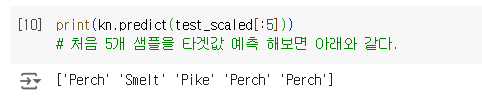

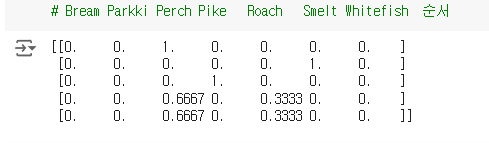




In [ ]:
# 타겟값 예측한 5개의 값으로 Perch = 1(100%)이 나오고 Smelt = 1(100%), Perch(0.667%) 등 이렇게 확률이 나온다.

In [14]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인이 필요하다.
distances, indexes = kn.kneighbors(test_scaled[3:4])    # 4번째 값을 자세히 보자.
print(train_target[indexes])

#                 Perch           Roach
# [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3, Roach 1/3 이기 때문에 7개를 확률로 제공하지 못함
# 이유는 n=neighbors=3 으로 했기 때문에 가장 가까운걸 근접

[['Roach' 'Perch' 'Perch']]


In [ ]:
# 알고리즘 변경 해보자 : 로지스틱 회귀(LogisticRegression)
# 로지스틱 회귀는 사이킷런에서 제공함. from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀는 이름이 회귀이지만 분류 모델이라는 점.
# 선형회귀와 동일하게 선형방정식을 학습한다.

# z = a * (Weight)  + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# a, b, c, d, e, f는 각 항목에 대한 가중치(중요도, 계수)이다.
# z는 어떤 값도 가능하지만, 확률이 되려면 0 ~ 1 (0% ~ 100%) 사이값
# z가 아주 큰 음수일때 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수, 로지스틱 함수가 있다.

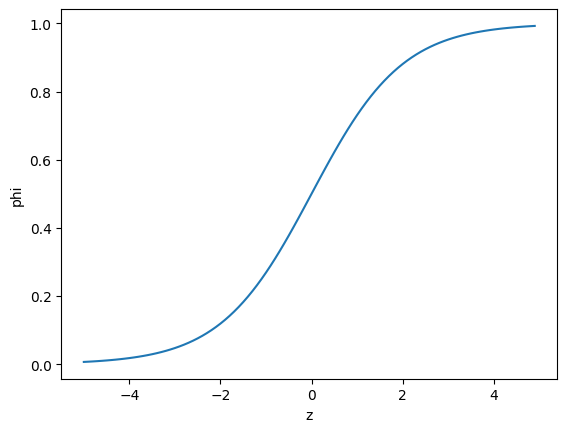

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용 : z가 무한하게 큰 음수일 경우 0에 가까워진다. z가 무한하게 큰 양 수일 경우 1에 가까워진다.

z = np.arange(-5, 5 , 0.1)  # -5 ~ 5까지 0.1 간격으로 배열 생성
phi = 1 / (1 + np.exp(-z))  # np.exp() 함수로 시그모이드 적용

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
# 선형 방정식의 출력 z의 음수를 사용하여 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다.
# 이렇게 하면 0 ~ 1 사이 값을 0 ~ 100% 확률로 해석할 수 있다.

# 훈련 전에 2진분류부터 알아보자.
# 2진분류인 경우에는 시그모이드 함수 출력이 0.5 보다 크면 양성, 0.5보다 작으면 음성으로 판단
# 단, 딱 0.5가 나오면 라이브러리마다 다른데 사이킷런은 음성으로 판단한다.

In [16]:
# 로지스틱 회귀로 이진 분류 수행 테스트

# 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. (Boolean Indexing)
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

# 결과가 True인 값만 출력이 된다.

['A' 'C']


In [18]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내어 보자.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#                                       Bream(도미) or Smelt(빙어)

# Bream_smelt_indexes에 도미와 빙어일 경우 True이고 나머지는 False가 들어 있다.
# 이 배열을 사용해서 train_scaled, train_target 배열에 인덱싱을 적용하면
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.

In [19]:
# 사이킷런에 선형 모델에 로지스틱 회귀 클래스 사용

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 로지스틱 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt)   # 훈련 시작 ! -> 2진분류로 나온다

LogisticRegression()

In [20]:
# train_bream_smelt 처음 5개의 값으로 결론을 보자.
print(lr.predict(train_bream_smelt[:5]))    # 도미 4개, 빙어 1개

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [21]:
print(lr.predict_proba(train_bream_smelt[:5]))  # 확률 확인(predict_proba)

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [22]:
# 샘플 마다 2개의 확률이 출력이된다. (시그모이드 함수)
# 첫번째 열이 0(음성)에 대한 확률, 두번째 열이 1(양성)에 대한 확률
# 여기서, 중요한 것은 사이킷런의 타깃 값은 알파벳 순으로 정렬하여 사용한다.
print(lr.classes_)  # 도미가 양성으로 사용된다.

# 두번째 샘플만 양성 클래스인 빙어의 확률이 높다. (나머지는 도미로 예측함)

# 만약, 도미(Bream)를 양성 클래스로 사용하고 싶으면 전처리에서 Bream인 타겟값을 1로 만들어야 한다.

['Bream' 'Smelt']


In [23]:
# 로지스틱 회귀로 학습한 계수(중요도)를 알아보자.
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [24]:
# [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774] 이거를 선형방정식에 대입해서 결과가 나옴.

# z = a * (Weight)  + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f

# z = -0.40451732 * (Weight)  +  -0.57582787 * (Length) + -0.66248158 * (Diagonal) + -1.01329614 * (Height) + -0.73123131 * (Width) + -2.16172774 로 가중치가 결정됨

decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z값 출력해보면
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [25]:
# 이 z값을 시그모이드 함수에 통과 시키면 확률을 얻을 수 있다.
# 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. -> expit()

from scipy.special import expit

print(expit(decisions)) # phi = 1 / (1 + np.exp(-z))

# 여기까지가 2개의 물고기 분류하는 방법
#[ 도미          빙어       도미        도미     도미   ]
#[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [26]:
# 다중분류로 진행 해보기(2진분류는 True가 아니면 모두 False 처리)
# 현재 어종이 7개 임으로 로지스틱회귀로 분류를 학습함.

# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다.(max_iter=100)
# 다만, max_iter=100 으로 지정해버리면 부족하다라는 경고 문구가 나오니 1000으로 향상

# LogisticRegression 기본적으로 릿지 회귀와 같은 계수를 제곱을 규제한다. (L2 규제)
# 릿지 회귀에서는 Alpha 매개변수로 규제의 양을 조절 하였음. -> alpha가 크면 규제도 커진다.
# LogisticRegression 규제를 제어하는 매개변수가 C로 되어 있음 -> C가 작으면 규제가 커진다.(기본:1)
# 규제를 완화하기 위해서는 20으로 늘리겠다.

lr = LogisticRegression(C=20, max_iter=1000) # max_iter=1000 정확도를 위해서 1000번 반복
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target)) # 약 93%
print(lr.score(test_scaled, test_target))   # 92.5%
# 과소나 과대적합이 아닌듯 함

0.9327731092436975
0.925


In [27]:
print(lr.predict(test_scaled[:5]))  # 결과 분석 시 다중 분류로 나온다.

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [28]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# Bream Parkki Perch Pike   Roach   Smelt Whitefish
# [[0.    0.014 0.842 0.    0.135 0.007 0.003]
#  [0.    0.003 0.044 0.    0.007 0.946 0.   ]
#  [0.    0.    0.034 0.934 0.015 0.016 0.   ]
#  [0.011 0.034 0.305 0.006 0.567 0.    0.076]
#  [0.    0.    0.904 0.002 0.089 0.002 0.001]]

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [29]:
print(lr.classes_)      # 알파벳 순으로 정렬된다.
# 7개의 클래스가 명확하게 구분이 된다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [30]:
# 다중 분류일 때 선형방정식

print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) -> 5개의 특성을 사용함, 7행을 가지고 있음
# (7,) -> 7개의 행을 가지고 있음 -> 이진 분류에서 봤던 z을 7개를 계산함.
# 다중 분류는 클래스마다 z값을 하나씩 계산 한다는 의미
# 당연히 가장 높은 z값을 출력하는 클래스가 에측 클래스가 된다.

(7, 5) (7,)


In [ ]:
# 그럼 확률은 ?? 이진 분류에서는 시그모이드 함수 사용해서 z를 0과 1사이 값으로 변환 했었다.
# 그러나, 다중분류에서는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환한다.

# 소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum .... s7 = e^z7 / e_sum -> s1 ~ s7 까지 모두 더하면 분모가 같아져서 1이 된다.

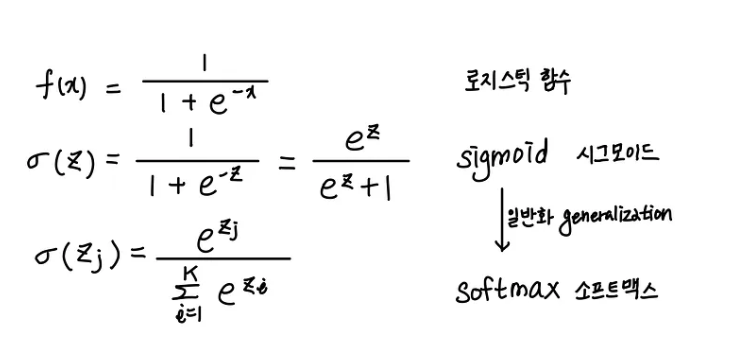

In [33]:
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1 ~ z7의 값\n")

for idx,z in enumerate(decision) :
    print(f"{idx}번째 샘플의 z값\n{z}\n")

5개 샘플에 대한 z1 ~ z7의 값

0번째 샘플의 z값
[-6.50722814  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625859
 -0.62549704]

1번째 샘플의 z값
[-10.87900747   1.94410609   4.77600607  -2.42306183   2.98748716
   7.84171377  -4.24724379]

2번째 샘플의 z값
[-4.33809959 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431898
 -3.87182371]

3번째 샘플의 z값
[-0.69143994  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143404
  1.25700485]

4번째 샘플의 z값
[-6.40138612 -1.99137623  5.81526372 -0.134644    3.49905134 -0.08753485
 -0.69937385]



In [34]:
from scipy.special import softmax
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis=1).round(2) * 100
con = np.column_stack((sm, prd))
print(pd.DataFrame(con, columns=class_))


소프트맥스 함수로 예측 확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
